In [8]:
import pandas as pd
import os

file_path = os.path.join("..", "data", "raw_analyst_ratings.csv")
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
df["headline_length"] = df["headline"].astype(str).apply(len)
df["headline_length"].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [10]:
df["publisher"].value_counts().head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [11]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["date"].dt.date.value_counts().sort_index().plot(kind="line", figsize=(12,4))


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

<Axes: xlabel='date'>

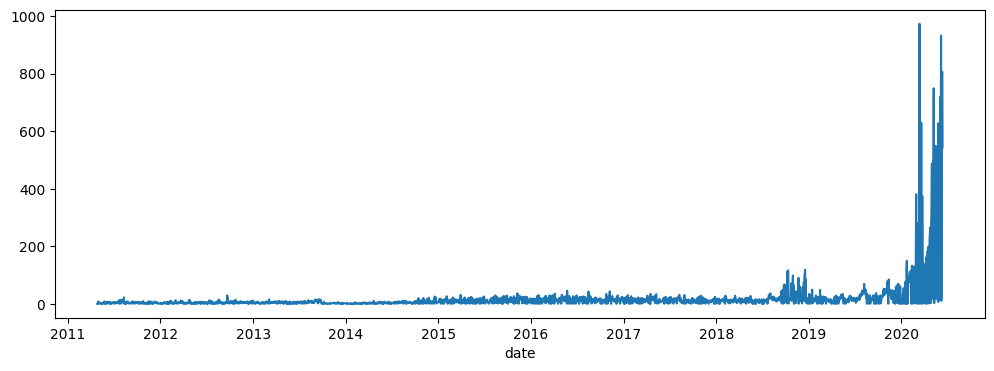

In [12]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["date"].dt.date.value_counts().sort_index().plot(kind="line", figsize=(12,4))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=20)
X = vectorizer.fit_transform(df["headline"].astype(str))
vectorizer.get_feature_names_out()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

topics = lda.components_
for idx, topic in enumerate(topics):
    print(f"Topic {idx}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
